# Project 6

You are a data scientist working for a Consulting Firm. You are given a dataset containing in sentiment140.csv. The data set has six columns without header:

+ the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
+ the id of the tweet (2087)
+ the date of the tweet (Sat May 16 23:58:44 UTC 2009)
+ the query (lyx). If there is no query, then this value is NO_QUERY.
+ the user that tweeted (robotickilldozr)
+ the text of the tweet ("Lyx is cool")

Data source: http://help.sentiment140.com/for-studentsLinks to an external site.

Our goal is to **visualize the text of the tweet**.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import scattertext as st
import seaborn as sns
import spacy
import string

from pprint import pprint
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE 

### Q1. Load the dataset of sentiment140.csv into memory.

In [2]:
Sentiment_Data = pd.read_csv('testdata.manual.2009.06.14.csv', header = None, 
                             names = ["Polarity", "ID", "Date", "Query", "User", "Text"])
Sentiment_Data.head(10)

,Polarity,ID,Date,Query,User,Text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


### Q2. Clean and preprocess the texts.

Select Features and Polarity

In [3]:
Sentiment_Data = Sentiment_Data[["User", "Text", "Polarity"]]

Check Missing Values

In [4]:
Sentiment_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      498 non-null    object
 1   Text      498 non-null    object
 2   Polarity  498 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [5]:
Missing = Sentiment_Data.isnull().sum() * 100 / len(Sentiment_Data)
Missing

User        0.0
Text        0.0
Polarity    0.0
dtype: float64

Clean the "Text" Column

In [6]:
nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def clean_text(sentence):
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    text = [ word.lemma_ for word in nlp(sentence) if word not in stop_words]
    return ' '.join(text).strip().lower()

Sentiment_Data['Cleaned_Text'] = Sentiment_Data['Text'].apply(clean_text)

Check Data

In [7]:
Sentiment_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User          498 non-null    object
 1   Text          498 non-null    object
 2   Polarity      498 non-null    int64 
 3   Cleaned_Text  498 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


In [8]:
Missing = Sentiment_Data.isnull().sum() * 100 / len(Sentiment_Data)
Missing

User            0.0
Text            0.0
Polarity        0.0
Cleaned_Text    0.0
dtype: float64

In [9]:
Sentiment_Data.head(10)

,User,Text,Polarity,Cleaned_Text
0,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,4,i loooooooovvvvvveee my kindle2 not that the d...
1,vcu451,Reading my kindle2... Love it... Lee childs i...,4,read my kindle2 love it lee child be good read
2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",4,ok first assesment of the kindle2 it fuck rock
3,SIX15,@kenburbary You'll love your Kindle2. I've had...,4,you ll love your kindle2 i ve have mine for a ...
4,yamarama,@mikefish Fair enough. But i have the Kindle2...,4,fair enough but i have the kindle2 and i think...
5,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...,4,no it be too big i m quite happy with the kindle2
6,Seth937,Fuck this economy. I hate aig and their non lo...,0,fuck this economy i hate aig and their non loa...
7,dcostalis,Jquery is my new best friend.,4,jquery be my new good friend
8,PJ_King,Loves twitter,4,love twitter
9,mandanicole,how can you not love Obama? he makes jokes abo...,4,how can you not love obama he make joke about ...


### Q3. Graphically summarize the polarity of the tweets.

In [10]:
Sentiment_Data['Polarity'].value_counts(normalize= True)

4    0.365462
0    0.355422
2    0.279116
Name: Polarity, dtype: float64

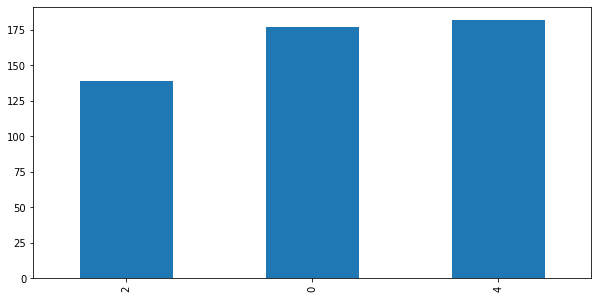

In [11]:
x = Sentiment_Data.Polarity.value_counts().sort_values().plot(kind = 'bar', figsize = (10, 5))

### Q4. Graphically summarize the length of the text of the tweet using:

+ boxplot
+ histogram
+ density plot

In [12]:
Sentiment_Data["Len_Text_BC"] = Sentiment_Data["Text"].str.len()
Sentiment_Data["Len_Text_AC"] = Sentiment_Data["Cleaned_Text"].str.len()

pd.options.display.float_format = "{:.2f}".format
Sentiment_Data[["Len_Text_BC", "Len_Text_AC"]].describe()

,Len_Text_BC,Len_Text_AC
count,498.00,498.00
mean,80.41,65.70
std,35.79,32.58
min,11.00,8.00
25%,53.25,38.00
50%,75.00,60.50
75%,108.00,91.00
max,144.00,141.00


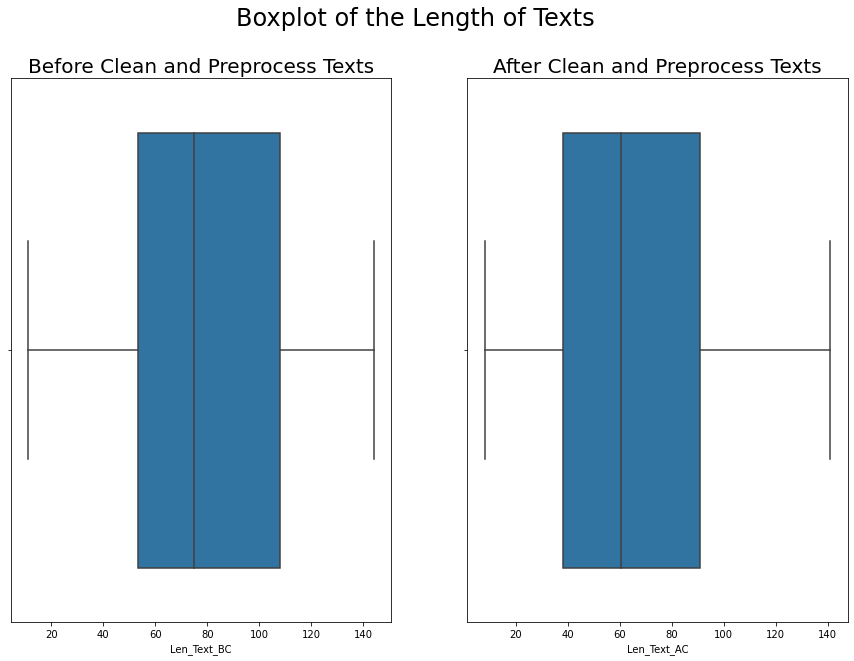

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Boxplot of the Length of Texts', fontsize = 24)

sns.boxplot(ax = axes[0], x = Sentiment_Data["Len_Text_BC"])
axes[0].set_title("Before Clean and Preprocess Texts", fontsize = 20)

sns.boxplot(ax = axes[1], x = Sentiment_Data["Len_Text_AC"])
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize = 20)

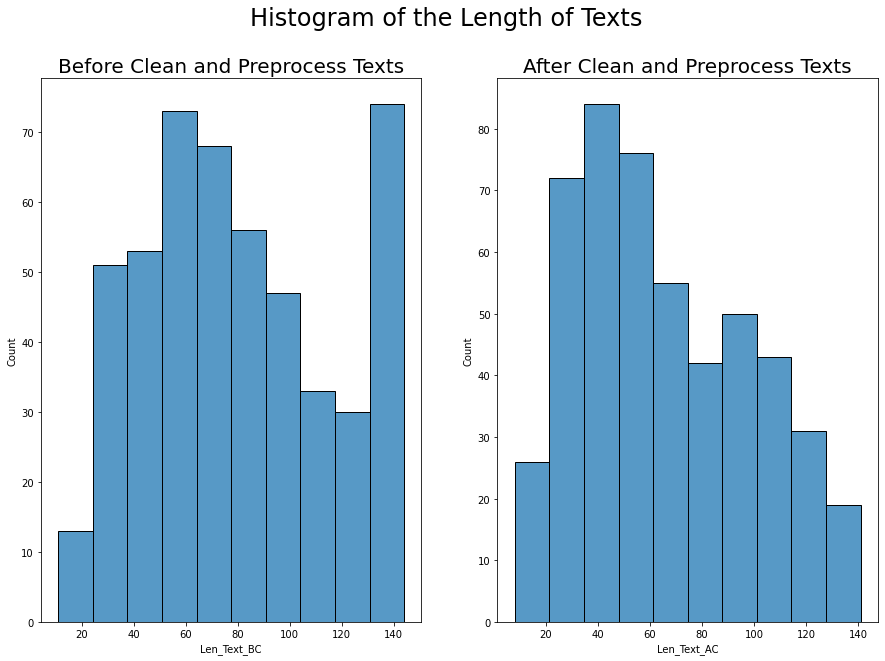

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Histogram of the Length of Texts', fontsize = 24)

sns.histplot(ax = axes[0], data = Sentiment_Data, x = "Len_Text_BC")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize = 20)

sns.histplot(ax = axes[1], data = Sentiment_Data, x = "Len_Text_AC")
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize = 20)

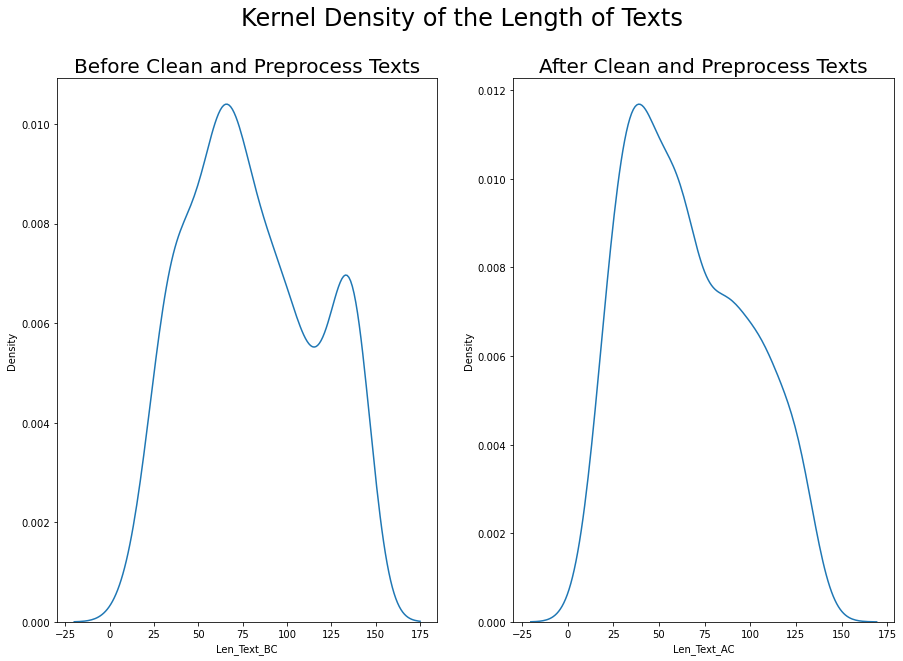

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Kernel Density of the Length of Texts', fontsize = 24)

sns.kdeplot(ax = axes[0], data = Sentiment_Data, x = "Len_Text_BC")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize = 20)

sns.kdeplot(ax = axes[1], data = Sentiment_Data, x = "Len_Text_AC")
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize = 20)

### Q5. Graphically summarize the word count of the text of the tweet using

+ boxplot
+ histogram
+ density plot

In [16]:
Sentiment_Data["Count_Word_BC"] = Sentiment_Data["Text"].str.split().str.len()
Sentiment_Data["Count_Word_AC"] = Sentiment_Data["Cleaned_Text"].str.split().str.len()

pd.options.display.float_format = "{:.2f}".format
Sentiment_Data[["Count_Word_BC", "Count_Word_AC"]].describe()

,Count_Word_BC,Count_Word_AC
count,498.00,498.00
mean,13.55,13.36
std,6.60,6.96
min,2.00,2.00
25%,8.00,7.00
50%,12.00,12.00
75%,18.00,18.00
max,30.00,31.00


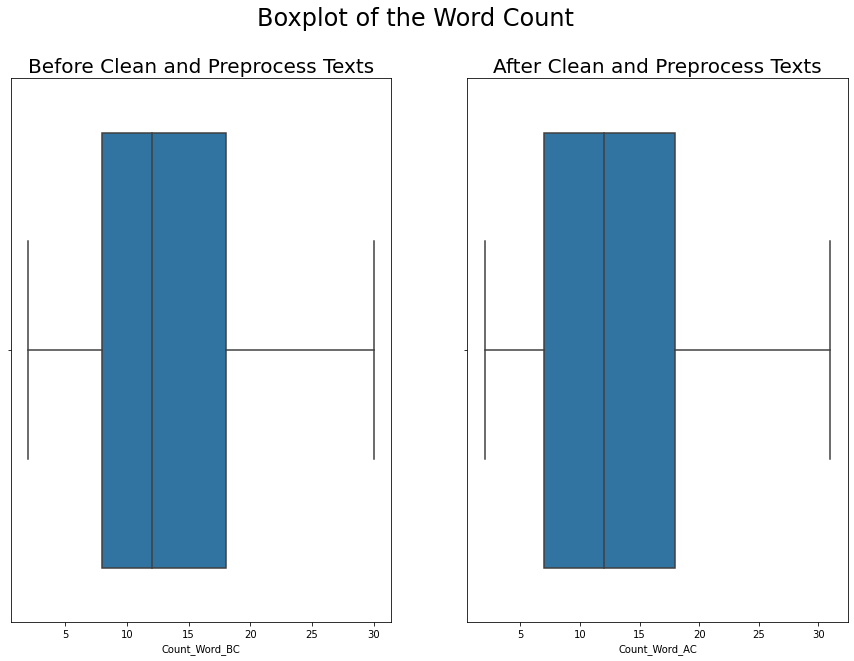

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Boxplot of the Word Count', fontsize = 24)

sns.boxplot(ax = axes[0], x = Sentiment_Data["Count_Word_BC"])
axes[0].set_title("Before Clean and Preprocess Texts", fontsize = 20)

sns.boxplot(ax = axes[1], x = Sentiment_Data["Count_Word_AC"])
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize = 20)

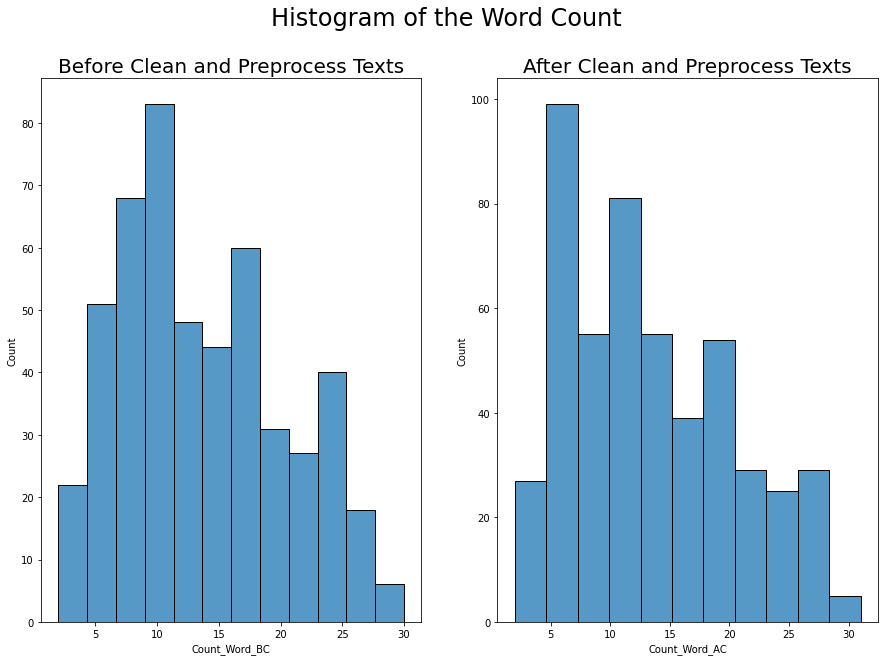

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Histogram of the Word Count', fontsize = 24)

sns.histplot(ax = axes[0], data = Sentiment_Data, x = "Count_Word_BC")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize = 20)

sns.histplot(ax = axes[1], data = Sentiment_Data, x = "Count_Word_AC")
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize = 20)

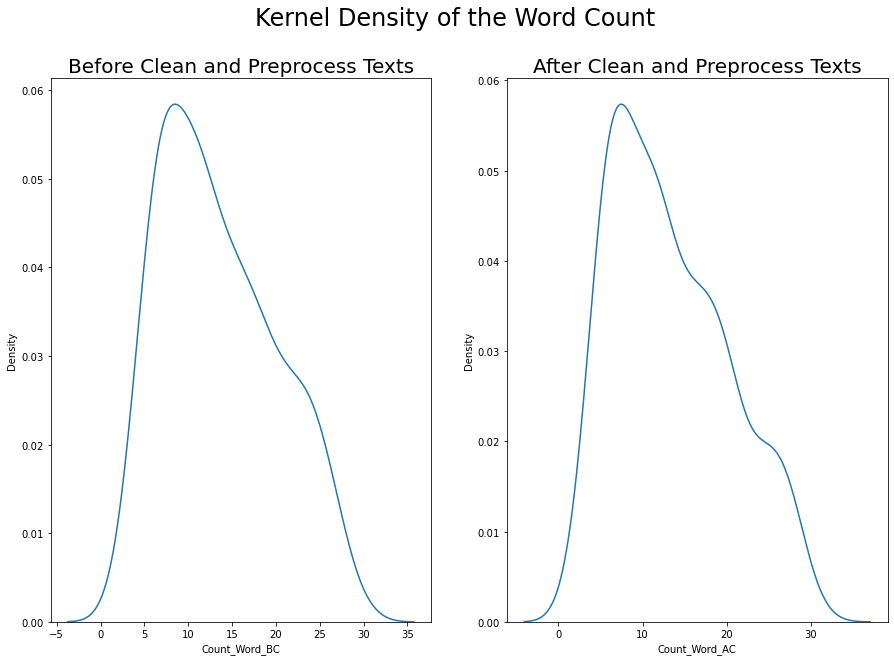

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))
fig.suptitle('Kernel Density of the Word Count', fontsize = 24)

sns.kdeplot(ax = axes[0], data = Sentiment_Data, x = "Count_Word_BC")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize = 20)

sns.kdeplot(ax = axes[1], data = Sentiment_Data, x = "Count_Word_AC")
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize = 20)

### Q6. Graphically summarize the top 10 bigrams (2-gram) of the tf-idf of the text of the tweet.

In [20]:
def get_top_tf_idf_words(df = Sentiment_Data, col = "Text", use_idf = True, ngram_range = (2, 2), top_n = 10):    
    tf_idf = TfidfVectorizer(stop_words = 'english', ngram_range = ngram_range, use_idf = use_idf)
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names())
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx]})

top_n = 10

Df_Text_BC = get_top_tf_idf_words(df = Sentiment_Data, col = "Text", top_n = top_n)
Df_Text_AC = get_top_tf_idf_words(df = Sentiment_Data, col = "Cleaned_Text", top_n = top_n)

/Users/GrahamMacbookPro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


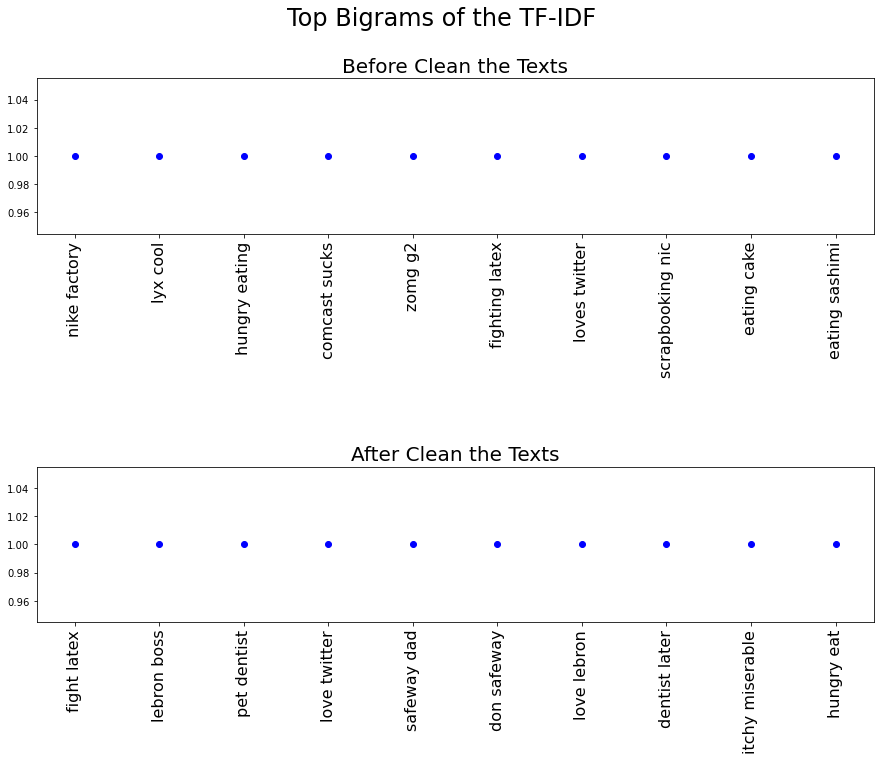

In [21]:
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (15, 10))
fig.suptitle('Top Bigrams of the TF-IDF', fontsize = 24)

ax[0].plot(x, Df_Text_BC.tf_idf, 'bo')
ax[0].set_title('Before Clean the Texts', fontsize = 20)
ax[0].set_xticks(x)
x_ticks_labels = Df_Text_BC.feature
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 16)

ax[1].plot(x, Df_Text_AC.tf_idf, 'bo')
ax[1].set_title('After Clean the Texts', fontsize = 20)
ax[1].set_xticks(x)
x_ticks_labels = Df_Text_AC.feature
ax[1].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 16)

fig.subplots_adjust(hspace = 1.5)
plt.show()

### Q7. Visualize the top 10 term frequency of the tokens associated with negative tweets using scattertext.

In [22]:
nlp = spacy.load("en_core_web_sm")

Corpus_BC = st.CorpusFromPandas(Sentiment_Data, category_col = 'Polarity', text_col = 'Text', nlp = nlp).build()

Corpus_AC = st.CorpusFromPandas(Sentiment_Data, category_col = 'Polarity', text_col = 'Cleaned_Text', nlp = nlp).build()

In [23]:
Term_Freq_Df_BC = Corpus_BC.get_term_freq_df()
Term_Freq_Df_BC['Negative Score'] = Corpus_BC.get_scaled_f_scores(0)

Term_Freq_Df_BC_Freq = Term_Freq_Df_BC.sort_values(by = '0 freq', ascending = False)
Term_Freq_Df_BC_Score = Term_Freq_Df_BC.sort_values(by = 'Negative Score', ascending = False)

Term_Freq_Df_AC = Corpus_AC.get_term_freq_df()
Term_Freq_Df_AC['Negative Score'] = Corpus_AC.get_scaled_f_scores(0)

Term_Freq_Df_AC_Freq = Term_Freq_Df_AC.sort_values(by = '0 freq', ascending = False)
Term_Freq_Df_AC_Score = Term_Freq_Df_AC.sort_values(by = 'Negative Score', ascending = False)

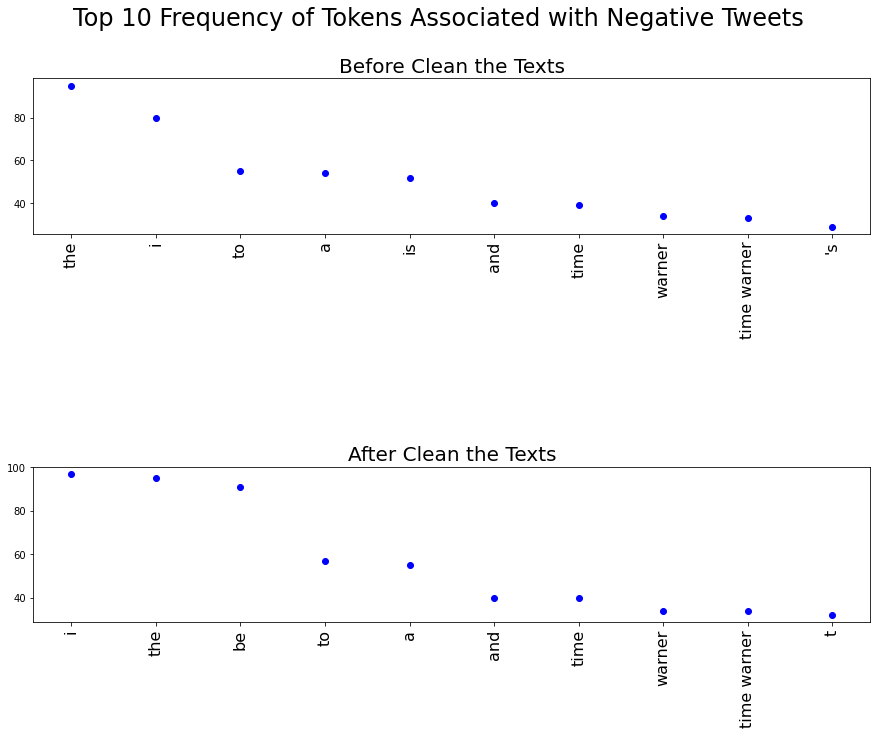

In [24]:
top_n = 10
Term_Freq_Df_AC_Freq = Term_Freq_Df_AC_Freq.head(top_n)
Term_Freq_Df_BC_Freq = Term_Freq_Df_BC_Freq.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (15, 10))

fig.suptitle('Top 10 Frequency of Tokens Associated with Negative Tweets', fontsize= 24)

ax[0].plot(x, Term_Freq_Df_BC_Freq["0 freq"], 'bo')
ax[0].set_title('Before Clean the Texts', fontsize = 20)
ax[0].set_xticks(x)
x_ticks_labels = Term_Freq_Df_BC_Freq.index
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 16)

ax[1].plot(x, Term_Freq_Df_AC_Freq["0 freq"], 'bo')
ax[1].set_title('After Clean the Texts', fontsize = 20)
ax[1].set_xticks(x)
x_ticks_labels = Term_Freq_Df_AC_Freq.index
ax[1].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 16)

fig.subplots_adjust(hspace = 1.5)
plt.show()

### Q8. Visualize the top 10 negative scores of the tokens associated with negative tweets using scattertext.

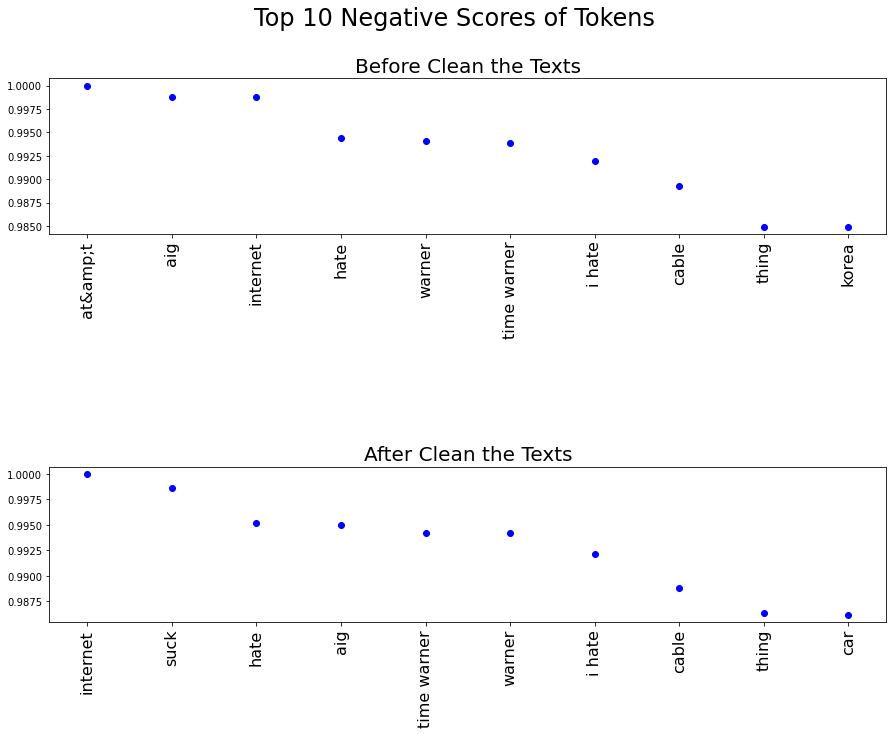

In [25]:
top_n = 10
Term_Freq_Df_AC_Score = Term_Freq_Df_AC_Score.head(top_n)
Term_Freq_Df_BC_Score = Term_Freq_Df_BC_Score.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (15, 10))

fig.suptitle('Top 10 Negative Scores of Tokens', fontsize = 24)

ax[0].plot(x, Term_Freq_Df_BC_Score["Negative Score"], 'bo')
ax[0].set_title('Before Clean the Texts', fontsize = 20)
ax[0].set_xticks(x)
x_ticks_labels = Term_Freq_Df_BC_Score.index
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 16)

ax[1].plot(x, Term_Freq_Df_AC_Score["Negative Score"], 'bo')
ax[1].set_title('After Clean the Texts', fontsize = 20)
ax[1].set_xticks(x)
x_ticks_labels = Term_Freq_Df_AC_Score.index
ax[1].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 16)

fig.subplots_adjust(hspace = 1.5)
plt.show()

### Q9. Visualize the first five sentences embedding for each tweet using PCA.

In [26]:
nlp = spacy.load("en_core_web_lg")

Data_BC = []
Data_AC = []

top_n = 5
for idx, row in Sentiment_Data.iterrows():
    if idx < top_n:
        Data_AC.append([row['Cleaned_Text'], nlp(row['Cleaned_Text']).vector, row['Polarity']])
        Data_BC.append([row['Text'], nlp(row['Text']).vector, row['Polarity']])
     
    else:
        break
        
Df_AC = pd.DataFrame(Data_AC, columns=['Review_AC', "Vector", "Polarity"])
Df_BC = pd.DataFrame(Data_BC, columns=['Review_BC', "Vector", "Polarity"])

pprint(Df_AC)

                                           Review_AC  \
0  i loooooooovvvvvveee my kindle2 not that the d...   
1     read my kindle2 love it lee child be good read   
2     ok first assesment of the kindle2 it fuck rock   
3  you ll love your kindle2 i ve have mine for a ...   
4  fair enough but i have the kindle2 and i think...   

                                              Vector  Polarity  
0  [0.07340385, 0.12959947, -0.1912311, -0.081685...         4  
1  [-0.06299361, 0.300183, -0.1941047, 0.01124000...         4  
2  [-0.09175789, 0.11143001, -0.21592635, -0.0938...         4  
3  [-0.027535714, 0.10515518, -0.23745984, -0.010...         4  
4  [-0.060056094, 0.2560183, -0.26641294, -0.1459...         4  


In [27]:
X_BC = np.array(list(Df_BC["Vector"]))
X_AC = np.array(list(Df_AC["Vector"]))

pca = PCA(n_components = 2)
PCA_BC_2d = pca.fit_transform(X_BC)
PCA_AC_2d = pca.fit_transform(X_AC)

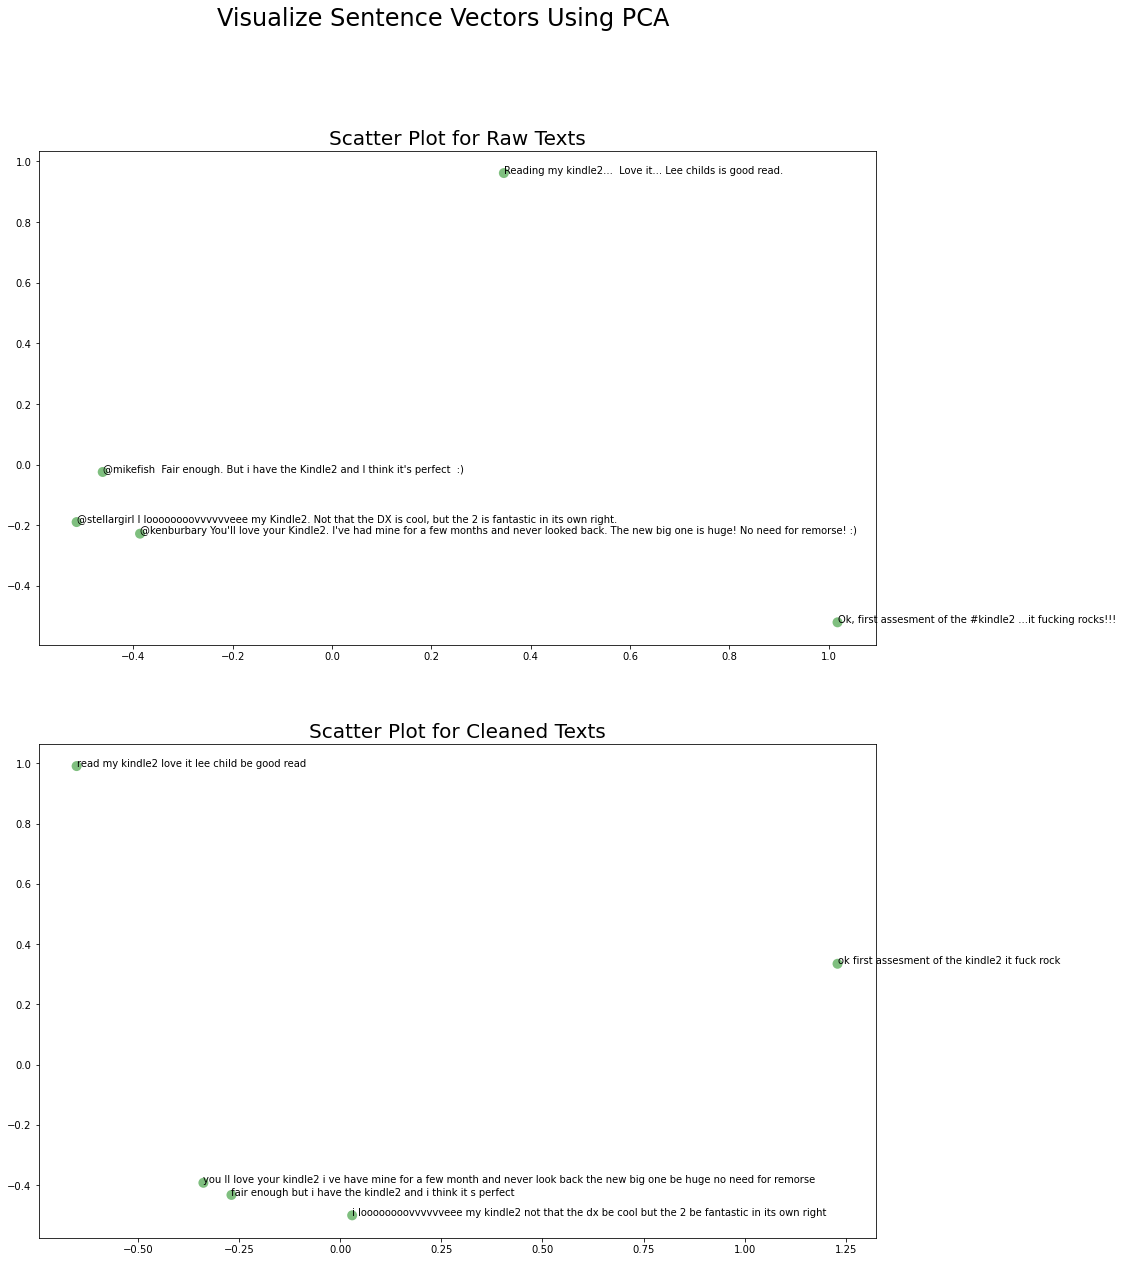

In [28]:
Review_AC = Df_AC.Review_AC
Review_BC = Df_BC.Review_BC

fig, ax = plt.subplots(2, 1, figsize = (15, 10 * 2))
fig.suptitle('Visualize Sentence Vectors Using PCA', fontsize = 24)
colors = {4:'green', 0:'red', 2:'yellow'}

ax[0].scatter(PCA_BC_2d[:,0], PCA_BC_2d[:,1], s = 100, c = Df_BC["Polarity"].map(colors), 
            cmap = "coolwarm", edgecolor = "None", alpha = 0.5)
ax[0].set_title('Scatter Plot for Raw Texts', fontsize = 20)
for idx, txt in enumerate(Review_BC):
    ax[0].annotate(txt, (PCA_BC_2d[idx, 0], PCA_BC_2d[idx, 1]))

ax[1].scatter(PCA_AC_2d[:,0], PCA_AC_2d[:,1], s = 100, c = Df_AC["Polarity"].map(colors), 
            cmap = "coolwarm", edgecolor = "None", alpha = 0.5)
for idx, txt in enumerate(Review_AC):
    ax[1].annotate(txt, (PCA_AC_2d[idx, 0], PCA_AC_2d[idx, 1]))
ax[1].set_title('Scatter Plot for Cleaned Texts', fontsize = 20)

plt.show()

### Q10. Visualize the first five sentences embedding for each tweet using t-SNE.

/Users/GrahamMacbookPro/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/GrahamMacbookPro/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.290859
[t-SNE] KL divergence after 2400 iterations: 0.110458
[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 5 samples in 0.000s...
[t-SNE] Computed neighbors for 5 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 5 / 5
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.486561


/Users/GrahamMacbookPro/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/GrahamMacbookPro/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 4000 iterations: 0.123352


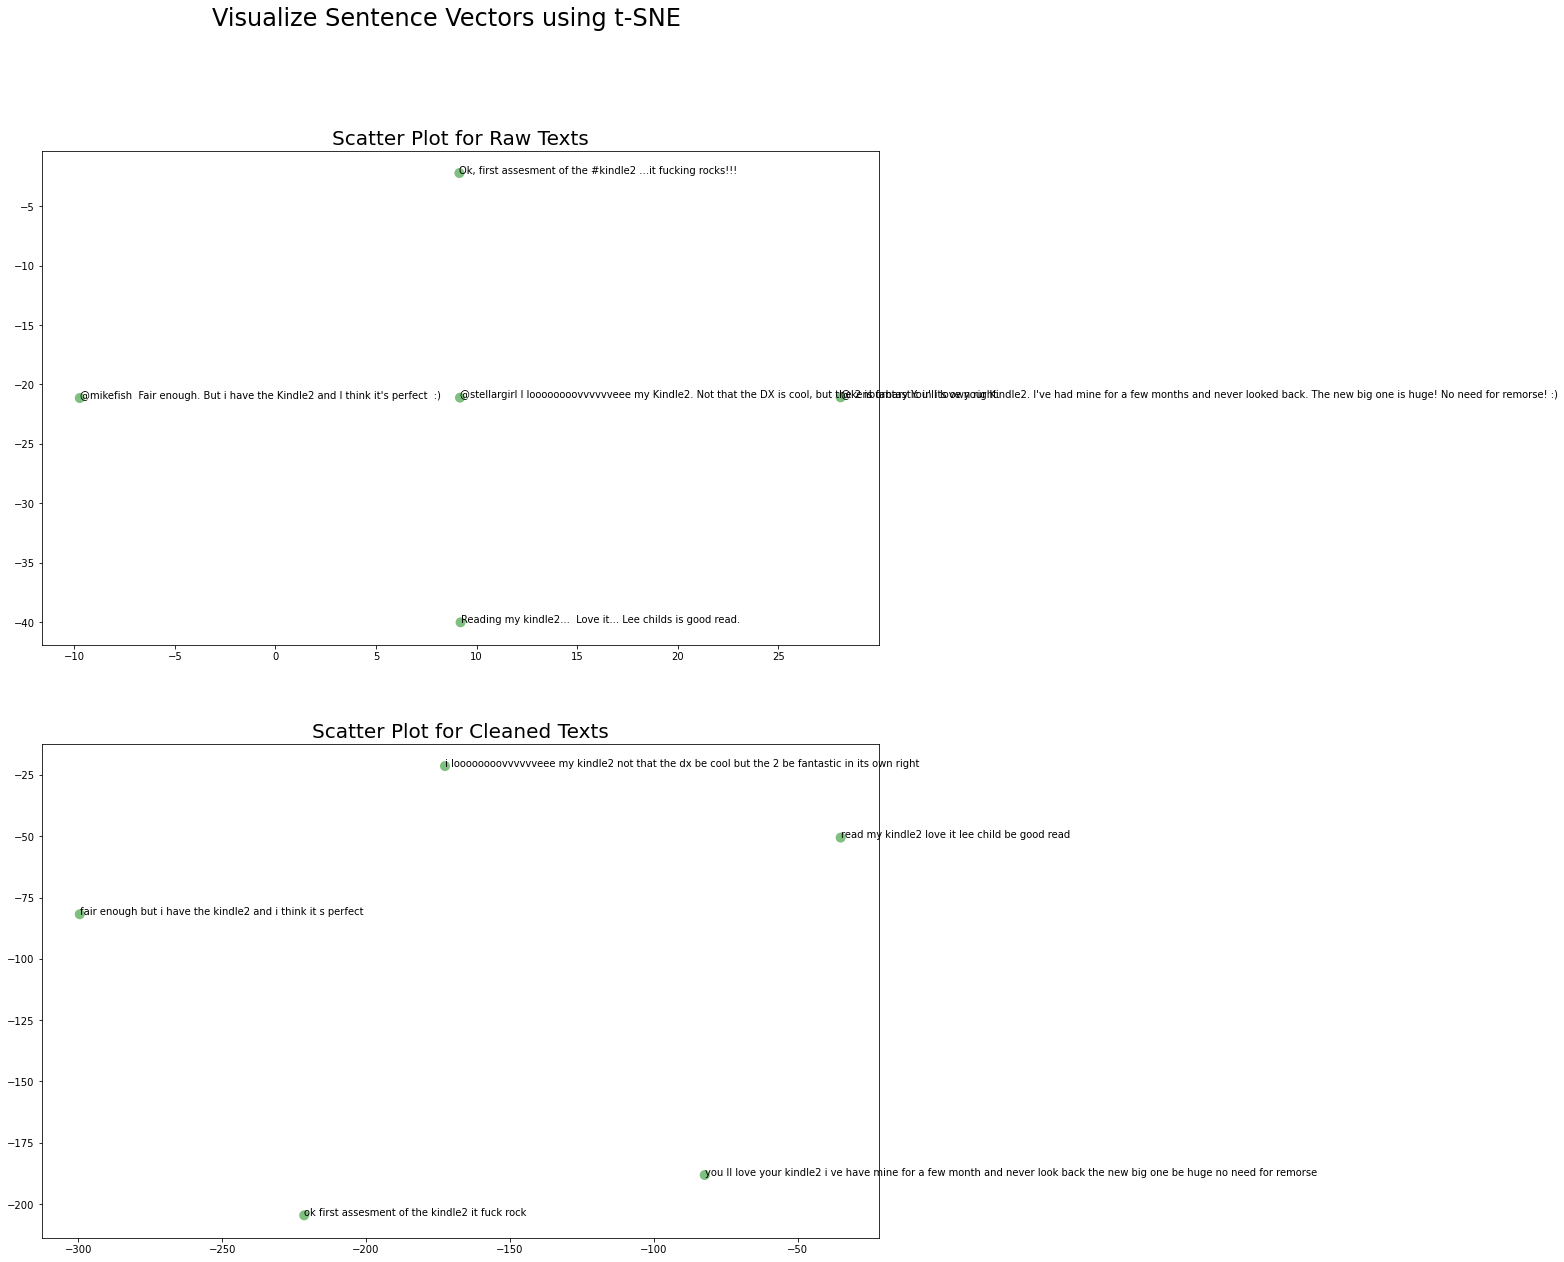

In [29]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 50, n_iter = 4000)
tsne_AC = tsne.fit_transform(X_AC)
tsne_BC = tsne.fit_transform(X_BC)

Review_AC = Df_AC.Review_AC
Review_BC = Df_BC.Review_BC

fig, ax = plt.subplots(2, 1, figsize = (15, 10 * 2))
fig.suptitle('Visualize Sentence Vectors using t-SNE', fontsize = 24)
# color map the sentiments
colors = {4:'green', 0:'red', 2:'yellow'}

ax[0].scatter(tsne_BC[:,0], tsne_BC[:,1], s = 100, c = Df_BC["Polarity"].map(colors), 
            cmap = "coolwarm", edgecolor = "None", alpha = 0.5)
ax[0].set_title('Scatter Plot for Raw Texts', fontsize = 20)
for idx, txt in enumerate(Review_BC):
    ax[0].annotate(txt, (tsne_BC[idx, 0], tsne_BC[idx, 1]))

ax[1].scatter(tsne_AC[:,0], tsne_AC[:,1], s = 100, c = Df_AC["Polarity"].map(colors),
            cmap = "coolwarm", edgecolor = "None", alpha = 0.5)
for idx, txt in enumerate(Review_AC):
    ax[1].annotate(txt, (tsne_AC[idx, 0], tsne_AC[idx, 1]))
ax[1].set_title('Scatter Plot for Cleaned Texts', fontsize = 20)

plt.show()